In [1]:
import tensorflow as tf
import numpy as np
import pylab as plt
print(tf.__version__)

1.14.0


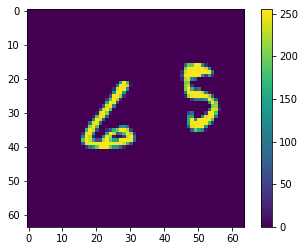

In [2]:
data = np.load("mnist_test_seq.npy")
data = np.swapaxes(data, 0, 1)

num_predicted_frames = 5

data_train_input_enc = data[100:10000, :10, :, :]
data_train_input_dec = data[100:10000, 9:9+num_predicted_frames, :, :]
data_train_output = data[100:10000, 10:10+num_predicted_frames, :, :]

data_test_input = data[0:100, :10, :, :]
data_test_output = data[0:100, 10:10+num_predicted_frames, :, :]

plt.imshow(data_test_input[4][0])
plt.colorbar()
plt.show()

#Scaling values between -1 and 1
data_train_input_enc = (data_train_input_enc - 127.5) / 255.0
data_train_input_dec = (data_train_input_dec - 127.5) / 255.0
data_train_output = (data_train_output - 127.5) / 255.0
data_test_input = (data_test_input - 127.5) / 255.0
data_test_output = (data_test_output - 127.5) / 255.0

#Adding Channels of dimension 1 IMPORTANT if using CNNs
train_in_enc = np.expand_dims(data_train_input_enc, axis=4)
train_in_dec = np.expand_dims(data_train_input_dec, axis=4)
train_out = np.expand_dims(data_train_output, axis=4)
test_in = np.expand_dims(data_test_input, axis=4)
test_out = np.expand_dims(data_test_output, axis=4)


# output_frames.shape
# output_frames = np.squeeze(output_frames, axis=1)
# test_output_frames = np.squeeze(test_output_frames, axis=1)
# plt.plot(test_output_frames[0])
# plt.show()

# output_frames.shape
# plt.imshow(np.squeeze(test_output_frames[1], axis=2))
# plt.show()

In [3]:
!ls

Boston-Housing-Prelim (1).ipynb        MovingMNIST-ConvLSTM-autoencoder.ipynb
ClairVoyance                           Network Visualization.ipynb
EncDecCNN.ipynb                        NeuralNetTutorial.ipynb
KNN-MNIST.ipynb                        TensorflowCNN.ipynb
MNIST-CNN.ipynb                        mnist_test_seq.npy


In [4]:
max = 5

In [5]:

def encoder(inputs):
    l1 = tf.keras.layers.ConvLSTM2D(filters=1, kernel_size=(3, 3), padding = 'same', return_state=True)
    outputs, state_h, state_c = l1(inputs)
    return outputs, state_h, state_c
    



def decoder(inputs, state_h, state_c):
    l1 = tf.keras.layers.ConvLSTM2D(filters=1, kernel_size=(3,3), padding = 'same', return_sequences=True, return_state = True)
    outputs, new_state_h, new_state_c = l1(inputs, initial_state = [state_h, state_c])
    return outputs, new_state_h, new_state_c



"model.add(RepeatVector(num_repeat))\nmodel.add(Reshape(tuple([num_repeat]) + out_size[1:]))\n\nmodel.add(ConvLSTM2D(filters=5, kernel_size=(3, 3),\n                   padding='same', return_sequences=True))\nmodel.add(BatchNormalization())\n\nmodel.add(ConvLSTM2D(filters=10, kernel_size=(3, 3),\n                   padding='same', return_sequences=True))\nmodel.add(BatchNormalization())\n\nmodel.add(ConvLSTM2D(filters=1, kernel_size=(3, 3),\n                   padding='same', return_sequences=True))\nmodel.add(BatchNormalization())"

In [6]:
enc_inputs=tf.placeholder(dtype = tf.float32, shape=[None, 10, 64, 64, 1])
dec_inputs=tf.placeholder(dtype = tf.float32, shape=[None, num_predicted_frames, 64, 64, 1])
ground_truth=tf.placeholder(dtype = tf.float32, shape=[None, num_predicted_frames, 64, 64, 1])

_, state_h, state_c = encoder(enc_inputs)
dec_out, _, _ = decoder(dec_inputs, state_h, state_c)

loss = tf.reduce_mean(tf.pow(dec_out - ground_truth, 2))

trainer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)


batch_size = 30
num_epochs = 20

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
init=tf.global_variables_initializer()
local_init = tf.local_variables_initializer()
with tf.Session() as sess:
    #each call to sess.run() runs the approriate input within our tf session
    sess.run(init)
    sess.run(local_init)
    print("Starting to run session...")
    for epoch in range(num_epochs): #iterate through each epoch
        for i in range(train_out.shape[0]//batch_size): #iterate through the number of batches we can make from our samples
            batch_enc_in = train_in_enc[i*batch_size:(i+1)*batch_size]
            batch_dec_in = train_in_dec[i*batch_size:(i+1)*batch_size]
            batch_truth = train_out[i*batch_size:(i+1)*batch_size]
            #We have a batch of training images and labels. 
            #Now we need to run the model by inputing these into the place holders we made
            _ = sess.run([trainer], feed_dict={enc_inputs: batch_enc_in, dec_inputs: batch_dec_in, ground_truth: batch_truth})
        #Checking our accuracy each epoch...
        l = sess.run(
            loss, feed_dict={enc_inputs: batch_enc_in, dec_inputs: batch_dec_in, ground_truth: batch_truth})
        print(l)

Starting to run session...
0.033938877
0.03171972
0.0307195
0.030148348
0.029805124
